# Notebook: Conv-cGAN for experimental predictions

In [1]:
# import libraries
import numpy as np
import Conv_cGAN as cGAN

In [2]:
# initialize cGAN model
cgan = cGAN.CGAN_CNN()

# print architecture
# cgan.generator.summary()
# cgan.discriminator.summary()

In [3]:
# load label to train the scaler (simulated data)
label = np.load("label.npy") 
# set and fit scaler for cGAN output
scaler, scaler_1 = cgan.set_scaler()  
scaler_1 = cgan.fit_scaler(scaler_1, label[:,0:1])

In [4]:
# load weights of pretrained model (here: prediction of Delta/t-ratio)
cgan = cgan.load_weights_uniform(cgan)

In [5]:
# generate new sample: parameter scaled in I=[0,1] -->  Delta/t in I[0.3,1.7]
cgan.generate_G(0.1, scaler, scaler_1) 

conditional parameter (t=1):
Delta/t =  0.44000172516691494


## Dataset 1: measured at $B_Z$ = 150 mT

In [6]:
# load data
gLL_all = np.load('measurement_data/conductance_data/gLL_db8.npy')
exp_labels = np.load('measurement_data/conductance_data/Delta_t_db8.npy')

Next you have to pick one of the measurements labeled by "n_measurement".
Additionally, you have to "center" the images by cropping out very roughly around the center. 
You have to find the center of the avoided-crossings/sweet-spot manually by changing "x_shift" and "y_shift" (can be tricky in the beginning)

0.8130546479585844


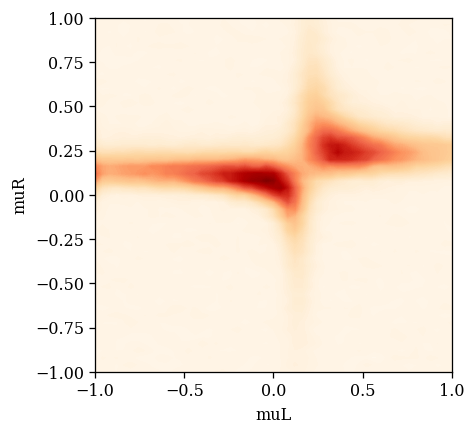

shift center left: increase "x_shift"
shift center down: increase "y_shift"


In [7]:
# reducing the image size to 28x28 pixels 
n_measurement = 15  # pick the measurement
print(exp_labels[n_measurement])

center_x = 16
center_y = 44

cut_image = cgan.cut_image_3D(gLL_all[n_measurement,:,:], x_shift=center_x, y_shift=center_y) # adjust the center position


### Prediction pipeline:
Run N (N=100 for the results in the manuscript) times the prediction for different positions (randomly) around the center and average result to obtain the standard deviation

In [13]:
N_runs = 10 # number of runs
N_pred = [] # save prediction of each run

for i in range(N_runs):
    print(i+1,'/',N_runs)
    # random variation around the center for cut_image()
    random_x = np.random.randint(-4,4)
    random_y = np.random.randint(-4,4)
    cut_image = cgan.cut_image_3D(gLL_all[n_measurement,:,:], x_shift=center_x+random_x,
                               y_shift=center_y+random_x, plot_images=False) 
    cut_image_scale = cgan.scale_exp_data(cut_image)  
    max_pred = cgan.experimental_data_max_pred(spectra=cut_image_scale, label=exp_labels, scaler_1=scaler_1,
                           n_plot=n_measurement, plot_orig = False, plot_pred = False, x_points=25)
    N_pred.append(max_pred)

1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [14]:
# analysing results
np.array(N_pred)
N_pred_round = np.round(N_pred,decimals=3)
N_pred_reduced = N_pred_round.tolist()

# removing "boundary-predictions"
num_remove = N_pred_reduced.count(0.3)
num_remove_2 = N_pred_reduced.count(1.7)
for i in range(num_remove):
    N_pred_reduced.remove(0.3)
for i in range(num_remove_2):
    N_pred_reduced.remove(1.7)

N_pred_all = np.array(N_pred_reduced)
N_pred_mean = np.mean(N_pred_all) 
N_pred_std = np.std(N_pred_all)

print('mean_pred  =', N_pred_mean)
print('mean_std   =', N_pred_std)
print('experiment =', exp_labels[n_measurement])

mean_pred  = 0.767
mean_std   = 0.0
experiment = 0.5521206197701948


## Dataset 2: measured at $B_Z$ = 100 mT

0.926


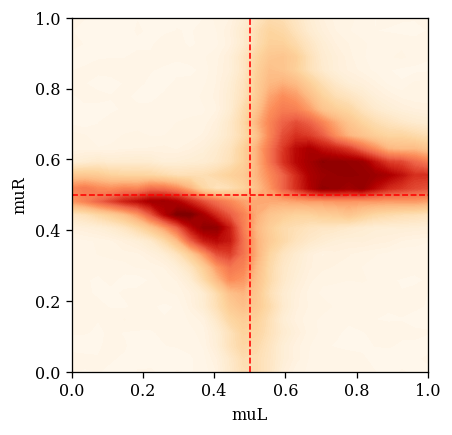

shift center left: increase "x_shift"
shift center down: increase "y_shift"


In [15]:
gLL_100mT = np.load('measurement_data/conductance_data/gLL_db15.npy')
labels_100mT = np.load('measurement_data/conductance_data/Delta_t_db15.npy')

n_measurement = 8 # pick the measurement

print(labels_100mT[n_measurement])

center_x = 10
center_y = 38

cut_image = cgan.cut_image_3D(gLL_100mT[n_measurement,:,:], x_shift=center_x, y_shift=center_y) # adjust the center position

In [16]:
N_runs = 10 # number of runs
N_pred = [] # save prediction of each run

for i in range(N_runs):
    print(i+1,'/',N_runs)
    # random variation around the center for cut_image()
    random_x = np.random.randint(-4,4)
    random_y = np.random.randint(-4,4)
    cut_image = cgan.cut_image_3D(gLL_100mT[n_measurement,:,:], x_shift=center_x+random_x,
                               y_shift=center_y+random_x, plot_images=False) 
    cut_image_scale = cgan.scale_exp_data(cut_image, scale_max=0.88, scale_grad=1.0)  
    max_pred = cgan.experimental_data_max_pred(spectra=cut_image_scale, label=labels_100mT, scaler_1=scaler_1,
                           n_plot=n_measurement, plot_orig = False, plot_pred = False, x_points=25)
    N_pred.append(max_pred)

1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [17]:
# analysing results
np.array(N_pred)
N_pred_round = np.round(N_pred,decimals=3)
N_pred_reduced = N_pred_round.tolist()

# removing "boundary-predictions"
num_remove = N_pred_reduced.count(0.3)
num_remove_2 = N_pred_reduced.count(1.7)
for i in range(num_remove):
    N_pred_reduced.remove(0.3)
for i in range(num_remove_2):
    N_pred_reduced.remove(1.7)

N_pred_all = np.array(N_pred_reduced)
N_pred_mean = np.mean(N_pred_all) 
N_pred_std = np.std(N_pred_all)

print('mean_pred  =', N_pred_mean)
print('mean_std   =', N_pred_std)
print('experiment =', labels_100mT[n_measurement])

mean_pred  = 0.6325000000000001
mean_std   = 0.10141622158215124
experiment = 0.926


# Benchmark: supervised CNN to predict $\Delta$/t 

A CNN model, trained on the same dataset, is used to predict the $\Delta$/t ratio for the same measurements.

In [18]:
import CNN as cnn
# define CNN
cnn = cnn.CNN()

# load label to train the scaler (simulated data)
label = np.load("label.npy")

# set scaler for Delta
scaler_cnn, scaler_1_cnn = cnn.set_scaler()
scaler_1_cnn = cnn.fit_scaler(scaler_1_cnn, label[:,0:1])
   
# load weights of pre-trained CNN
cnn.load_model(cnn)

In [19]:
# load data

# dataset 1: B_z = 150 mT
data_exp = np.load('measurement_data/conductance_data/gLL_db8.npy')
exp_labels =  np.load('measurement_data/conductance_data/Delta_t_db8.npy')

# dataset 2: B_z = 100 mT
#data_exp = np.load('measurement_data/conductance_data/gLL_db15.npy')
#exp_labels =  np.load('measurement_data/conductance_data/Delta_t_db15.npy')

In [20]:
# Predictions for experimental images with CNN
n_measurement = 0 # pick the same measurement as for the cGAN 

center_x = 12
center_y = 38

cut_image_cnn = cnn.cut_image_3D(data_exp[n_measurement,:,:], x_shift=center_x, y_shift=center_y, show_images=True)   
cut_image_scale_cnn = cnn.scale_exp_data(cut_image_cnn, scale_max=0.88, scale_grad=1.0)      
cnn.experimental_data(spectra=cut_image_scale_cnn, label=exp_labels[n_measurement],
                      scaler_1=scaler_1_cnn, plot_orig=False)

shift center left: increase "x_shift"
shift center down: increase "y_shift"
prediction: 0.7676648
measurement: 0.36662775424325317
